# Comuter Vision Example with fashion_mnist & mnist dataset

In [62]:
from platform import python_version
print(python_version())
print(tf.__version__)

3.7.9
2.1.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available())

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [3]:
# Loading the MNIST Dataset
mnist = tf.keras.datasets.fashion_mnist

Now Calling the load_data on this object which will give us 2 sets of 2 list...these will be the training and testing values for the graphics that contains the clothing items and their labels.

In [4]:
# Splitting the train and test data by calling the load_data method on mnist object
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

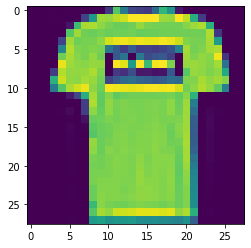

In [7]:
# Displaying the data.
np.set_printoptions(linewidth=200)
plt.imshow(training_images[1])
print(training_images[1])

In [12]:
# Scaling the data
training_images = training_images/255.0
test_images = test_images/255.0

In [13]:
#creating the model...deciding the no. of layers and no. of neurons in each layer.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [14]:
# compiling the model.
model.compile(optimizer=tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
# Fitting the data into our model.
model.fit(training_images,training_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 1.0932 - accuracy: 0.6653
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.6442 - accuracy: 0.7688
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5684 - accuracy: 0.7967
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5260 - accuracy: 0.8140
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4980 - accuracy: 0.8242


In [17]:
# Evaluating with the Test data.
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.5126 - accuracy: 0.8169


[0.5126117730140686, 0.8169]

In [63]:
# we have each image of shape 28*28
test_images[0].shape

(28, 28)

(2, 3)


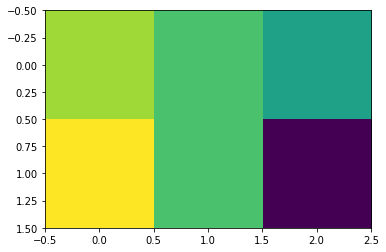

In [106]:
# just experimenting with different numbers.....randomly 
a = np.array([[10,0,-10],
             [20,0,-50]])
print(a.shape)
plt.imshow(a)

In [51]:
# Predicting the test images.
classifications = model.predict(test_images)

In [52]:
# it will give an array of 10 elements for each image. 
print(classifications[0])

[1.8207742e-06 2.2764897e-07 7.7261493e-06 7.2481257e-06 1.8460225e-05 1.8242641e-01 1.4803869e-05 3.3347264e-01 8.1868460e-03 4.7586381e-01]


The list of numbers it represents that the list of 10 items its showing the probability for each class

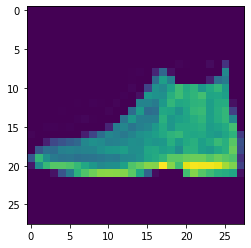

In [55]:
# plt.imshow helps you to convert the data into image
plt.imshow(test_images[0])

In [53]:
print(test_labels[0])

9


# Using CallBacks

Suppose you want to stop the training in between after getting the desired result so we use Callbacks

In [60]:
# First we will create a custom fuction inside a custom class

class my_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print('\n Stopping the training ...Reached 60% Accuracy!!!')
            self.model.stop_training = True
            
callbacks1 = my_callback() # creating a object of the class
mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10,callbacks=[callbacks1])



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4695 - accuracy: 0.8334
Epoch 2/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8689
 Stopping the training ...Reached 60% Accuracy!!!
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3578 - accuracy: 0.8690


# MNIST Dataset

In [71]:
mnist = tf.keras.datasets.mnist
(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

In [74]:
training_images.shape,testing_images.shape

((60000, 28, 28), (10000, 28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 25

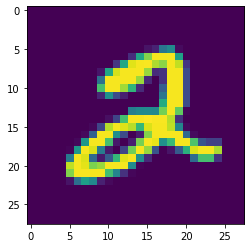

In [79]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[5])
print(training_images[5])

In [82]:
training_images[0].max() # so we have maximum number of 255 number representing the image pixel

255

In [102]:
def train_mnist() :
    mnist = tf.keras.datasets.mnist
    (training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()
    
    training_images = training_images/255.0
    testing_images = testing_images/255.0
    
    accuracy_threshold = 0.99
    
    class my_callback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>= accuracy_threshold):
                print('\n Stopping the training accuracy reached !! \n')
                self.model.stop_training = True
    
    callback1 = my_callback()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    history = model.fit(training_images,training_labels,epochs=10,callbacks=[callback1])
    return history.epoch , history.history['accuracy'][-1]
    
    
    
    
    

In [103]:
train_mnist()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2031 - accuracy: 0.9395
Epoch 2/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0823 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0531 - accuracy: 0.9835
Epoch 4/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0375 - accuracy: 0.9879
Epoch 5/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9907
 Stopping the training accuracy reached !! 

60000/60000 [==============================] - 9s 158us/sample - loss: 0.0273 - accuracy: 0.9907


([0, 1, 2, 3, 4], 0.9906833)